In [2]:
import pandas as pd
!git clone https://github.com/SBU-CE/Deep-Learning
stk_data = pd.read_csv('./Deep-Learning/spring-2022/assignments/project-4/GOOG.csv', index_col='Date')
stk_data.head()

Cloning into 'Deep-Learning'...
remote: Enumerating objects: 414, done.
remote: Counting objects: 100% (149/149), done.
remote: Compressing objects: 100% (133/133), done.
remote: Total 414 (delta 64), reused 23 (delta 11), pack-reused 265
Receiving objects: 100% (414/414), 16.43 MiB | 22.50 MiB/s, done.
Resolving deltas: 100% (149/149), done.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-20,542.117981,548.528992,541.968567,548.255005,548.255005,6547651
2013-12-23,551.851501,555.816650,550.496582,555.467957,555.467957,3456106
2013-12-24,555.403198,555.537720,551.981018,553.844055,553.844055,1473904
2013-12-26,554.924988,557.410706,552.274963,556.643555,556.643555,2685629
2013-12-27,557.908813,558.048279,554.392029,557.111816,557.111816,3151167


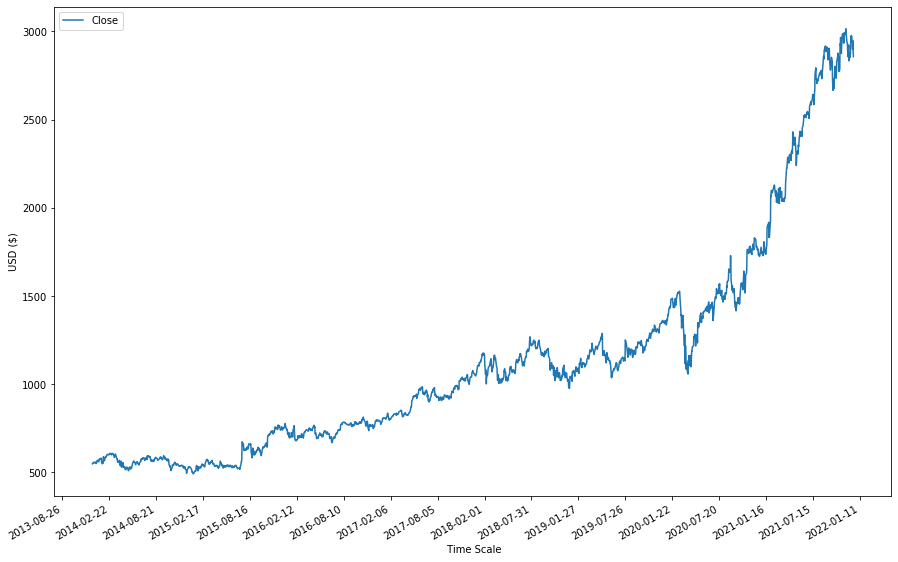

In [3]:
import matplotlib.dates as mdp
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdp.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdp.DayLocator(interval=180))
x_dates= [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in stk_data.index.values]

plt.plot(x_dates, stk_data['Close'], label='Close')
plt.xlabel(' Time Scale')
plt.ylabel('USD ($)')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

import torch
import torch.nn as nn

In [5]:
#Data Preprocessing
#Target and Features

data_close=stk_data.filter(['Close'])
sub_data=stk_data.iloc[:,0:4]
#feature Scaling
s_data=data_close.values
date_index=stk_data.index
sca=MinMaxScaler(feature_range=(0,1))
normal_data=sca.fit_transform(s_data)



In [6]:
#splitting Train and Test Data

def data_split(data, step_size):
    x,y,z=[],[],[]
    for i in range(step_size,len(data)):
        x.append(data[i-step_size:i,-1])
        y.append(data[i-1,-1])
    return np.array(x), np.array(y)

window_size=30  #The number of days to 
train_rate=0.8


x1, y1=data_split(normal_data, step_size=window_size)

split_index=int(np.ceil(len(x1)*(train_rate)))
x_train,x_test=x1[:split_index],x1[split_index:]
y_train,y_test=y1[:split_index],y1[split_index:]


print(x1.shape,x_train.shape,x_test.shape,y_train.shape, y_test.shape)    


#for i in range(window_size,len(test_data)):
#    xx_test.append(test_data[i-window_size:i,0])
#x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

y_train=np.reshape(y_train,(y_train.shape[0],1))
y_test=np.reshape(y_test,(y_test.shape[0],1))

print(x_train.shape)
print(y_test.shape)

(1983, 30) (1587, 30) (396, 30) (1587,) (396,)
(1587, 30, 1)
(396, 1)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model

drop_rate=0.15
Batch_size=8
Lstm_gru_units=80

Repeat= 0


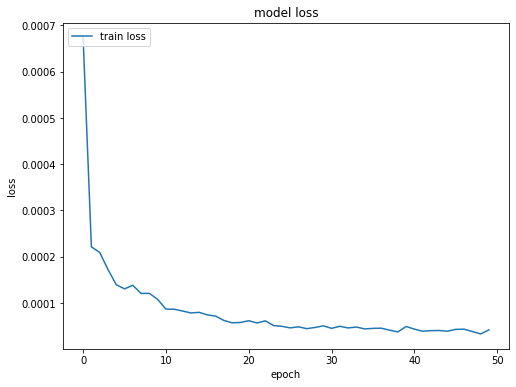

Normalized Rmse= 0.005076558006972305 RMSE= 12.808039979716574 MAPE= 0.005494648010999334
Repeat= 1


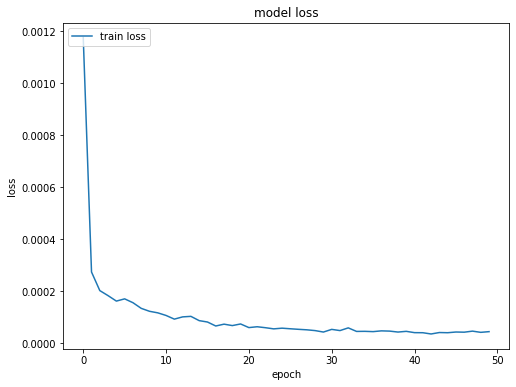

Normalized Rmse= 0.004624348107651972 RMSE= 11.667105202977574 MAPE= 0.0069803706528112535
Repeat= 2


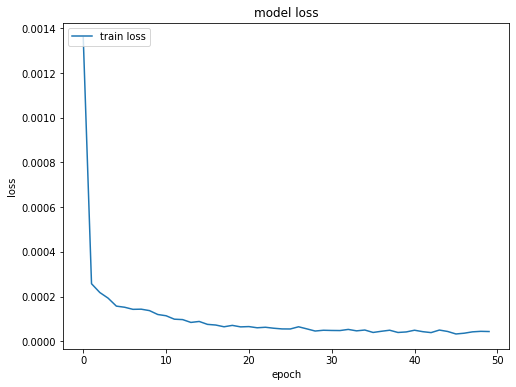

Normalized Rmse= 0.0034654032467304166 RMSE= 8.743119059433434 MAPE= 0.003739215756790327
Repeat= 3


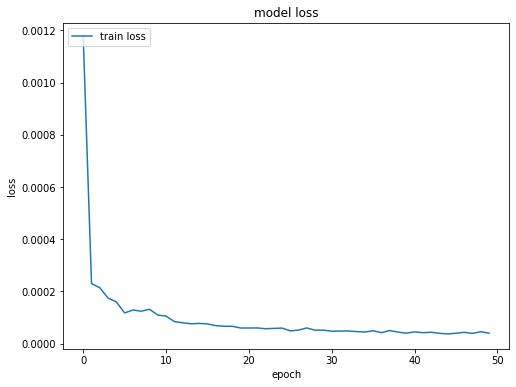

Normalized Rmse= 0.002793655851142175 RMSE= 7.048348245167274 MAPE= 0.0036080866468301267
Repeat= 4


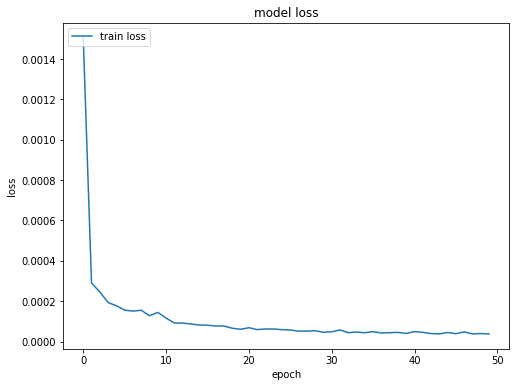

Normalized Rmse= 0.017235531260017267 RMSE= 43.48491527285724 MAPE= 0.0221233854063226
Repeat= 5


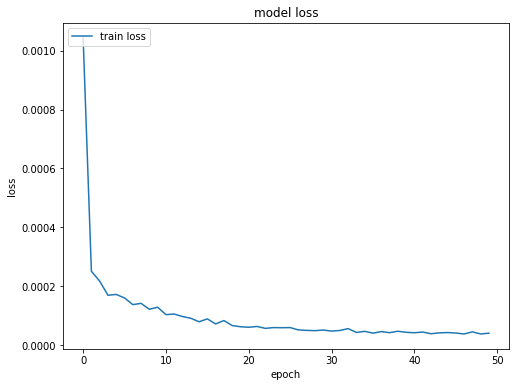

Normalized Rmse= 0.002397784696132054 RMSE= 6.049557942513245 MAPE= 0.0036325908906006074
Repeat= 6


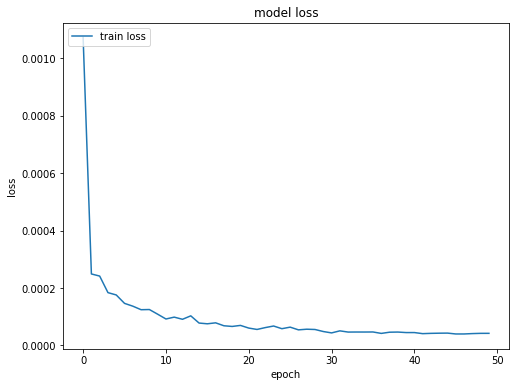

Normalized Rmse= 0.013593109322346147 RMSE= 34.29512663293482 MAPE= 0.01674140808169259
Repeat= 7


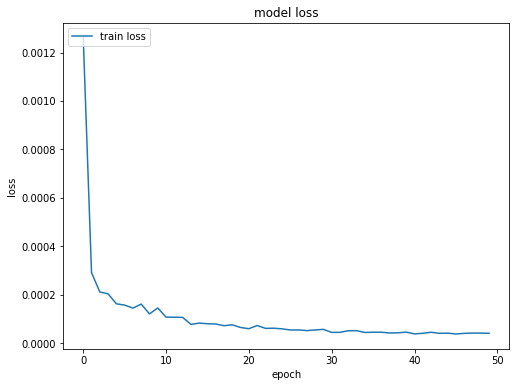

Normalized Rmse= 0.016309312396426204 RMSE= 41.14804217060902 MAPE= 0.022480911407131786
Repeat= 8


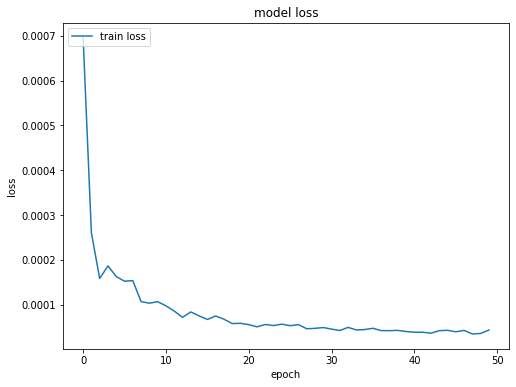

Normalized Rmse= 0.003089258054506334 RMSE= 7.794169776656065 MAPE= 0.003415338840512244
Repeat= 9


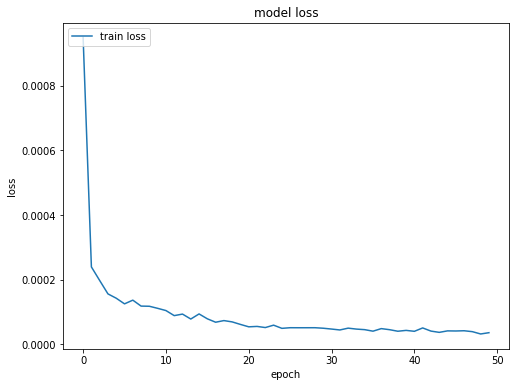

Normalized Rmse= 0.010140540946504956 RMSE= 25.584376769394183 MAPE= 0.0132805351770334
Mean Norm RMSE= 0.007872550188842984 Mean RMSE= 19.862280105225942 Mean MAPE= 0.010149649087072428


In [ ]:
av_rmse=0
av_rmse1=0
av_mape=0
  
#LSTM Model One
for i in range(10):
    lstm1=Sequential()
    lstm1.add(LSTM(Lstm_gru_units,input_shape=(x_train.shape[1],x_train.shape[2]),activation='tanh',return_sequences=False))
    lstm1.add(Dropout(drop_rate))
    lstm1.add(Dense(1))
    lstm1.compile(loss='mse',optimizer='adam')
    #lstm1.summary()
    plot_model(lstm1, to_file='model_plot1-1.png', show_shapes=True, show_layer_names=True)
    
  
    print('Repeat=',i)
    history=lstm1.fit(x_train,y_train,epochs=50,batch_size=Batch_size, verbose=0)
    y_test_pred=lstm1.predict(x_test)
    y_train_pred=lstm1.predict(x_train)

    rmse=mean_squared_error(y_test,y_test_pred,squared=False)
    av_rmse=av_rmse+rmse
    y_test_pred_nn=sca.inverse_transform(y_test_pred)
    y_train_pred_nn=sca.inverse_transform(y_train_pred)
    y_test_nn=sca.inverse_transform(y_test)
    rmse1=mean_squared_error(y_test_nn,y_test_pred_nn,squared=False)
    mape=mean_absolute_percentage_error(y_test,y_test_pred)
    av_rmse1=av_rmse1+rmse1
    av_mape=av_mape+mape
    lstm1.reset_states()
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train loss'], loc='upper left')
    plt.show()
    print('Normalized Rmse=',rmse, 'RMSE=',rmse1,'MAPE=',mape)

print('Mean Norm RMSE=',av_rmse/10,'Mean RMSE=',av_rmse1/10,'Mean MAPE=',av_mape/10)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


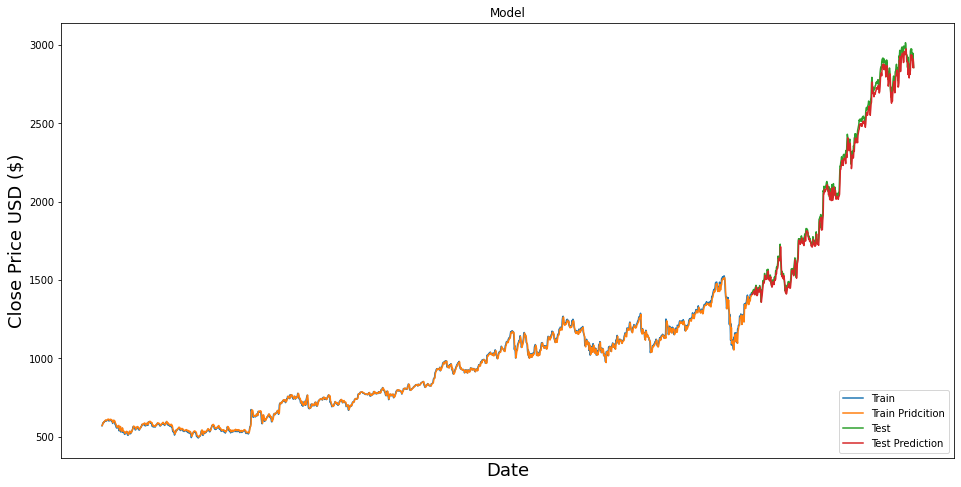

In [ ]:
train=data_close[window_size:split_index+window_size]
valid=data_close[split_index+window_size:]

train['Prediction'] =y_train_pred_nn
valid['Prediction'] =y_test_pred_nn


#Visualize the data
#print(valid)
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train[['Close','Prediction']])
plt.plot(valid[['Close', 'Prediction']])
plt.gca().xaxis.set_major_locator(mdp.DayLocator(interval=120))
plt.legend(['Train', 'Train Pridcition','Test', 'Test Prediction'], loc='lower right')
plt.show()
#valid.head()

Repeat= 0


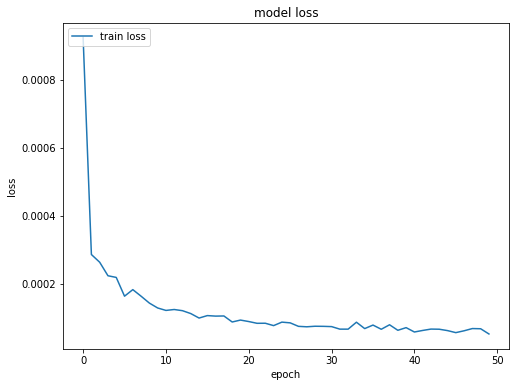

Normalized Rmse= 0.004634103152175059 RMSE= 11.691737731649173 MAPE= 0.003988075924661404
Repeat= 1


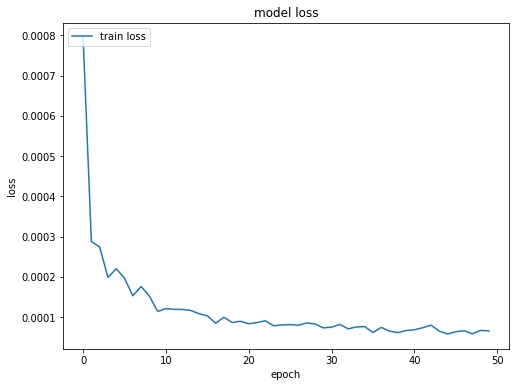

Normalized Rmse= 0.02083057512406638 RMSE= 52.55508607581782 MAPE= 0.026782450597754588
Repeat= 2


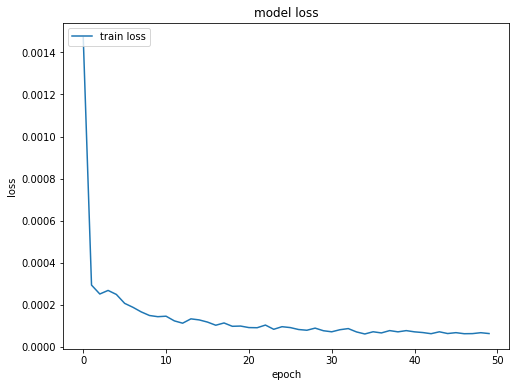

Normalized Rmse= 0.00710570003091426 RMSE= 17.927485684043685 MAPE= 0.009669361846131798
Repeat= 3


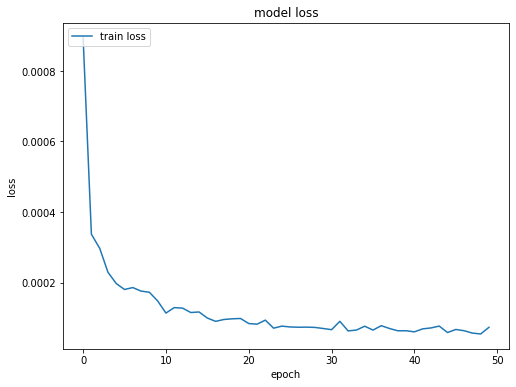

Normalized Rmse= 0.006153326857862664 RMSE= 15.524705972459524 MAPE= 0.005012008303156886
Repeat= 4


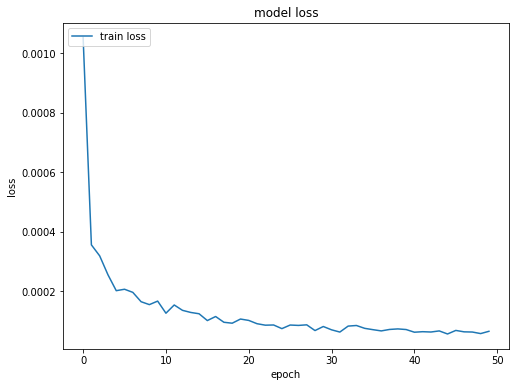

Normalized Rmse= 0.005825719363351615 RMSE= 14.698165451309027 MAPE= 0.005483934391423164
Repeat= 5


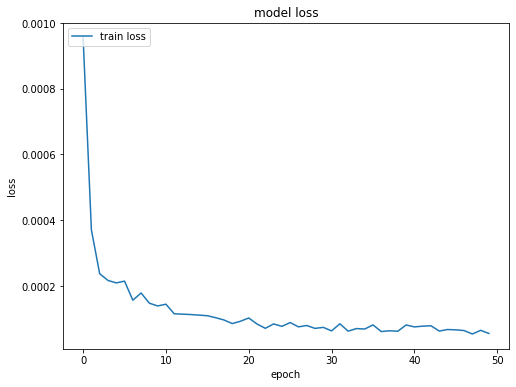

Normalized Rmse= 0.009719201210736158 RMSE= 24.52132711049996 MAPE= 0.012723995913521467
Repeat= 6


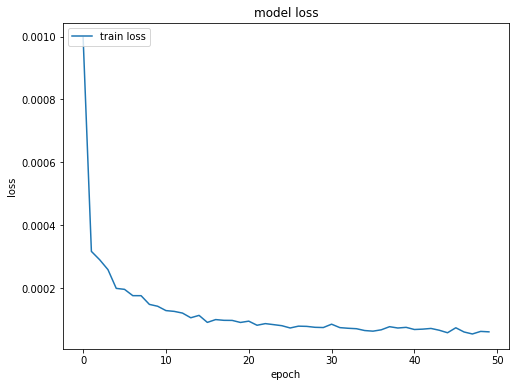

Normalized Rmse= 0.004187651804836417 RMSE= 10.565361710793166 MAPE= 0.004281954068203392
Repeat= 7


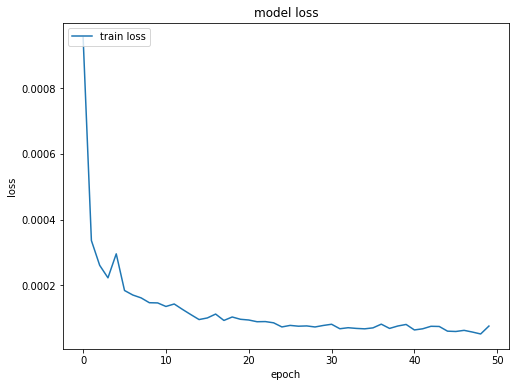

Normalized Rmse= 0.022414278797322072 RMSE= 56.550778211842065 MAPE= 0.025434408554283656
Repeat= 8


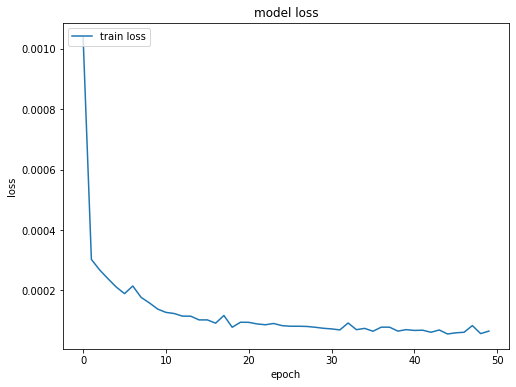

Normalized Rmse= 0.00868865835059449 RMSE= 21.921315468774996 MAPE= 0.011475853476575214
Repeat= 9


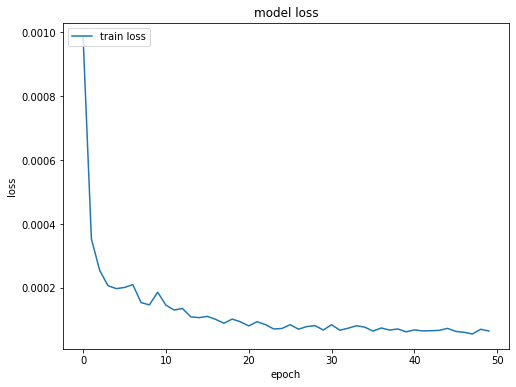

Normalized Rmse= 0.028171548659895258 RMSE= 71.07622264016008 MAPE= 0.03676524107368068
Mean Norm RMSE= 0.011773076335175438 Mean RMSE= 29.703218605734953 Mean MAPE= 0.014161728414939224


In [ ]:
#LSTM Model two
av_rmse=0
av_rmse1=0
av_mape=0
for i in range(10):
    lstm2=Sequential()
    lstm2.add(LSTM(Lstm_gru_units,input_shape=(x_train.shape[1],x_train.shape[2]),activation='tanh',return_sequences=True))
    lstm2.add(Dropout(drop_rate))
    lstm2.add(LSTM(units = Lstm_gru_units, activation='tanh', return_sequences = False))
    lstm2.add(Dropout(drop_rate))
    lstm2.add(Dense(1))
    lstm2.compile(loss='mse',optimizer='adam')
    #lstm2.summary()
    #plot_model(lstm2, to_file='model_plot1-2.png', show_shapes=True, show_layer_names=True)
   
  
    print('Repeat=',i)
    history=lstm2.fit(x_train,y_train,epochs=50,batch_size=Batch_size, verbose=0)
    y_test_pred=lstm2.predict(x_test)
    y_train_pred=lstm2.predict(x_train)

    rmse=mean_squared_error(y_test,y_test_pred,squared=False)
    av_rmse=av_rmse+rmse
    y_test_pred_nn=sca.inverse_transform(y_test_pred)
    y_train_pred_nn=sca.inverse_transform(y_train_pred)
    y_test_nn=sca.inverse_transform(y_test)
    rmse1=mean_squared_error(y_test_nn,y_test_pred_nn,squared=False)
    mape=mean_absolute_percentage_error(y_test,y_test_pred)
    av_rmse1=av_rmse1+rmse1
    av_mape=av_mape+mape
    lstm2.reset_states()
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train loss'], loc='upper left')
    plt.show()
    print('Normalized Rmse=',rmse, 'RMSE=',rmse1,'MAPE=',mape)

print('Mean Norm RMSE=',av_rmse/10,'Mean RMSE=',av_rmse1/10,'Mean MAPE=',av_mape/10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


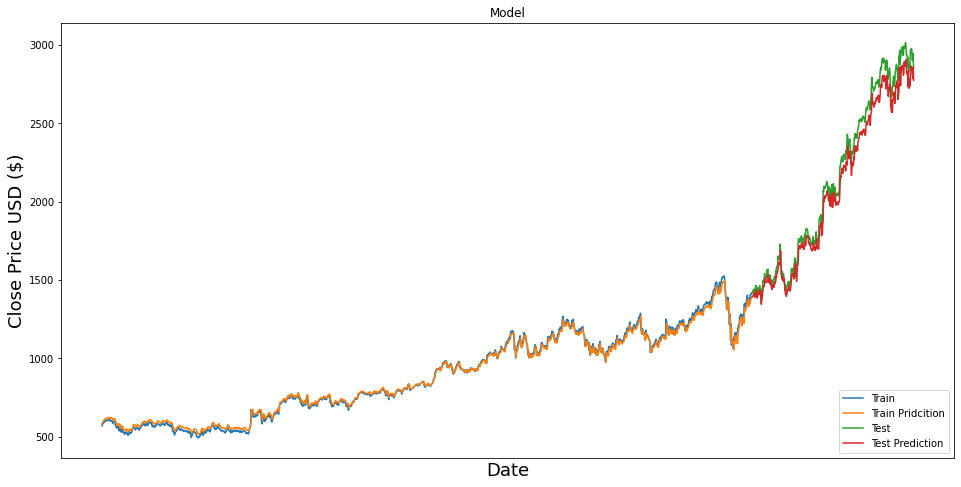

In [ ]:
train=data_close[window_size:split_index+window_size]
valid=data_close[split_index+window_size:]

train['Prediction'] =y_train_pred_nn
valid['Prediction'] =y_test_pred_nn


#Visualize the data
#print(valid)
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train[['Close','Prediction']])
plt.plot(valid[['Close', 'Prediction']])
plt.gca().xaxis.set_major_locator(mdp.DayLocator(interval=120))
plt.legend(['Train', 'Train Pridcition','Test', 'Test Prediction'], loc='lower right')
plt.show()
#valid.head()

Repeat= 0


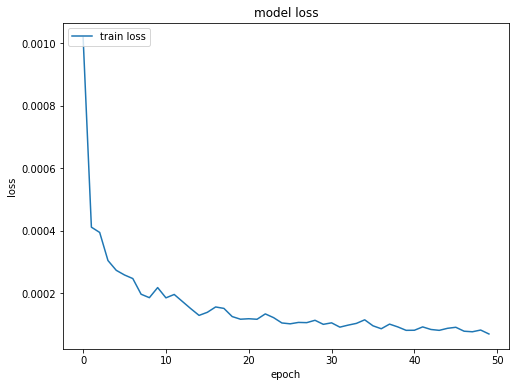

Normalized Rmse= 0.018255695521756574 RMSE= 46.05873882141384 MAPE= 0.021287715311707055
Repeat= 1


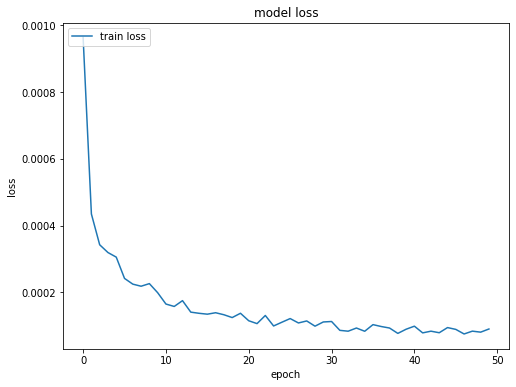

Normalized Rmse= 0.020546104299678968 RMSE= 51.83735594513414 MAPE= 0.030724924062860346
Repeat= 2


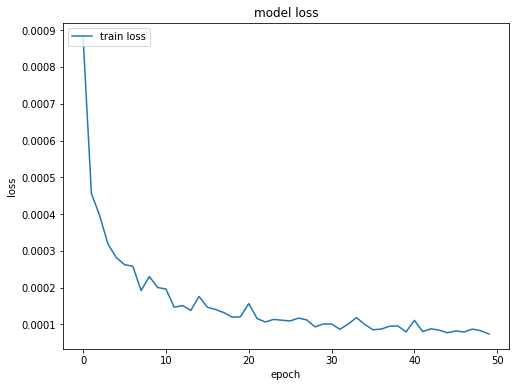

Normalized Rmse= 0.017479189420981252 RMSE= 44.0996182347532 MAPE= 0.018306755499464495
Repeat= 3


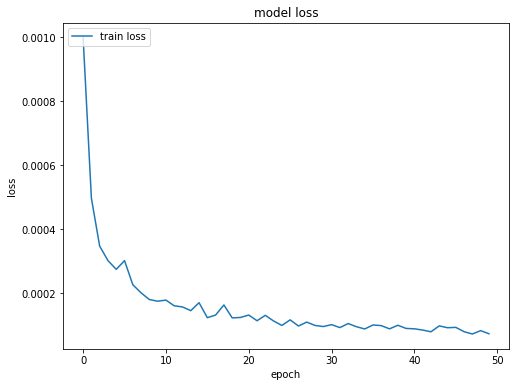

Normalized Rmse= 0.02812079693878877 RMSE= 70.94812089093118 MAPE= 0.03950766631238851
Repeat= 4


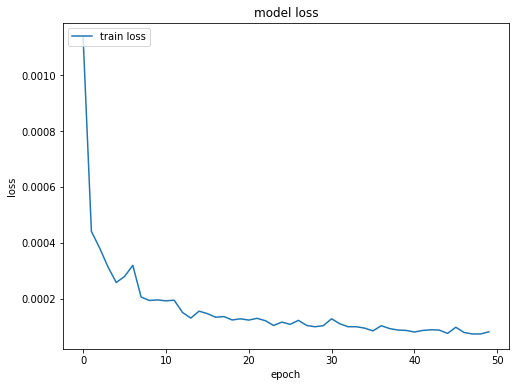

Normalized Rmse= 0.057686064609916064 RMSE= 145.54067708251267 MAPE= 0.08436858109926788
Repeat= 5


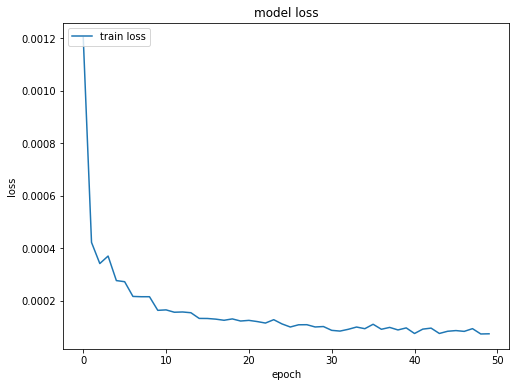

Normalized Rmse= 0.010388948237403616 RMSE= 26.211099883414754 MAPE= 0.00961444133997564
Repeat= 6


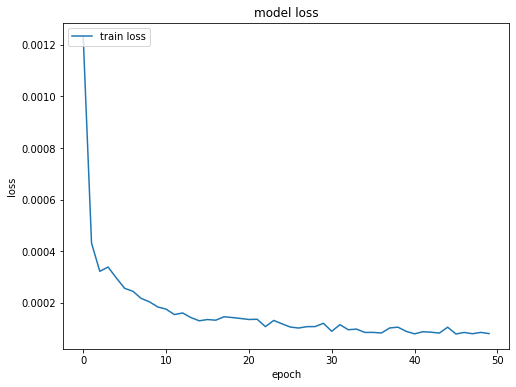

Normalized Rmse= 0.046153479804344526 RMSE= 116.44425638897116 MAPE= 0.06218774878000482
Repeat= 7


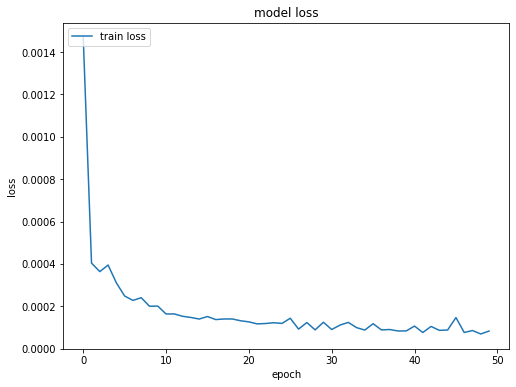

Normalized Rmse= 0.01822342679684154 RMSE= 45.977313802560346 MAPE= 0.015375905207808118
Repeat= 8


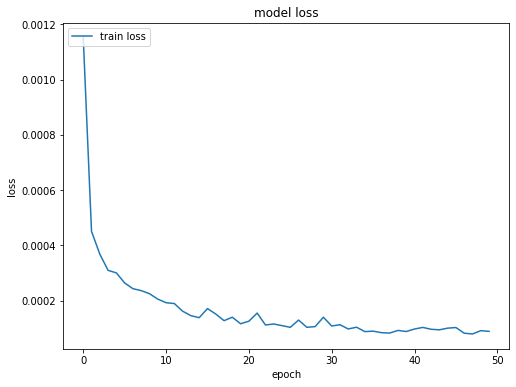

Normalized Rmse= 0.01163540177340435 RMSE= 29.355850734943004 MAPE= 0.018799783923926353
Repeat= 9


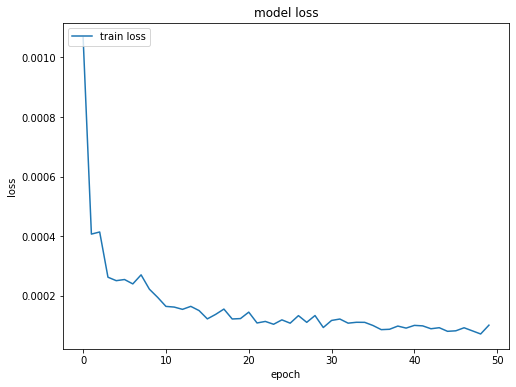

Normalized Rmse= 0.025974392738941646 RMSE= 65.53285156498163 MAPE= 0.03394763735319762
Mean Norm RMSE= 0.025446350014205733 Mean RMSE= 64.2005883349616 Mean MAPE= 0.03341211588906008


In [8]:
#LSTM Model Three

av_rmse=0
av_rmse1=0
av_mape=0
for i in range(10):
    print('Repeat=',i)
    lstm3=Sequential()
    lstm3.add(LSTM(Lstm_gru_units,input_shape=(x_train.shape[1],x_train.shape[2]),activation='tanh',return_sequences=True))
    lstm3.add(Dropout(drop_rate))
    lstm3.add(LSTM(units = Lstm_gru_units, activation='tanh', return_sequences = True))
    lstm3.add(Dropout(drop_rate))
    lstm3.add(LSTM(units = Lstm_gru_units, activation='tanh', return_sequences = False))
    lstm3.add(Dropout(drop_rate))
    lstm3.add(Dense(1))
    lstm3.compile(loss='mse',optimizer='adam')   
    #lstm3.summary()
    plot_model(lstm3, to_file='model_plot1-3.png', show_shapes=True, show_layer_names=True)

   
  
    
    history=lstm3.fit(x_train,y_train,epochs=50,batch_size=Batch_size, verbose=0)
    y_test_pred=lstm3.predict(x_test)
    y_train_pred=lstm3.predict(x_train)

    rmse=mean_squared_error(y_test,y_test_pred,squared=False)
    av_rmse=av_rmse+rmse
    y_test_pred_nn=sca.inverse_transform(y_test_pred)
    y_train_pred_nn=sca.inverse_transform(y_train_pred)
    y_test_nn=sca.inverse_transform(y_test)
    rmse1=mean_squared_error(y_test_nn,y_test_pred_nn,squared=False)
    mape=mean_absolute_percentage_error(y_test,y_test_pred)
    av_rmse1=av_rmse1+rmse1
    av_mape=av_mape+mape
    lstm3.reset_states()
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train loss'], loc='upper left')
    plt.show()
    print('Normalized Rmse=',rmse, 'RMSE=',rmse1,'MAPE=',mape)

print('Mean Norm RMSE=',av_rmse/10,'Mean RMSE=',av_rmse1/10,'Mean MAPE=',av_mape/10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


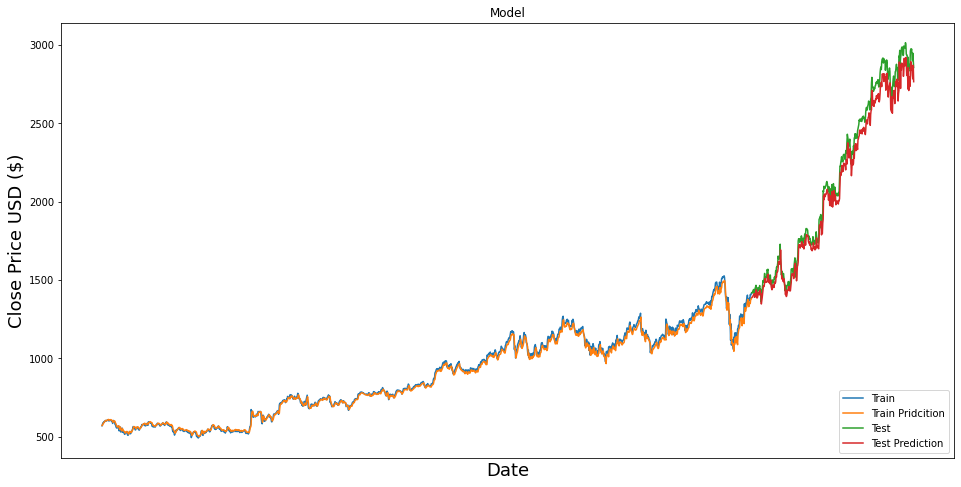

In [9]:
train=data_close[window_size:split_index+window_size]
valid=data_close[split_index+window_size:]

train['Prediction'] =y_train_pred_nn
valid['Prediction'] =y_test_pred_nn


#Visualize the data
#print(valid)
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train[['Close','Prediction']])
plt.plot(valid[['Close', 'Prediction']])
plt.gca().xaxis.set_major_locator(mdp.DayLocator(interval=120))
plt.legend(['Train', 'Train Pridcition','Test', 'Test Prediction'], loc='lower right')
plt.show()
#valid.head()

Repeat= 0


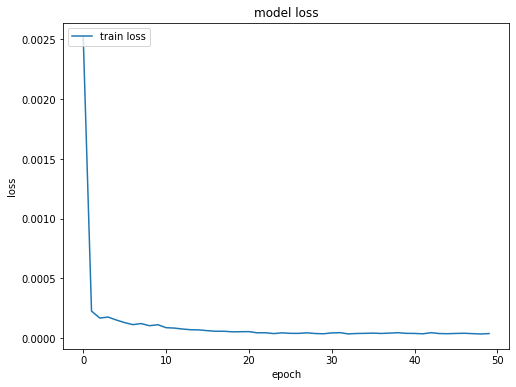

Normalized Rmse= 0.019520232906997188 RMSE= 49.24916489588748 MAPE= 0.0263128235622398
Repeat= 1


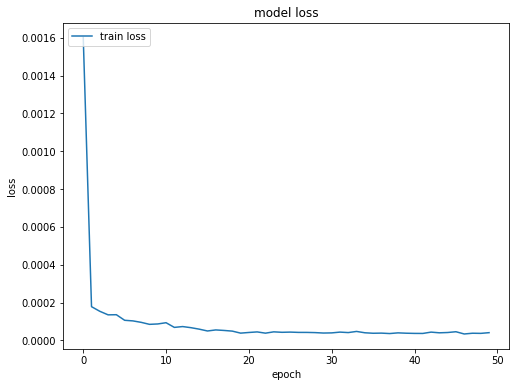

Normalized Rmse= 0.0036238541352088616 RMSE= 9.14294635689717 MAPE= 0.004094620857472847
Repeat= 2


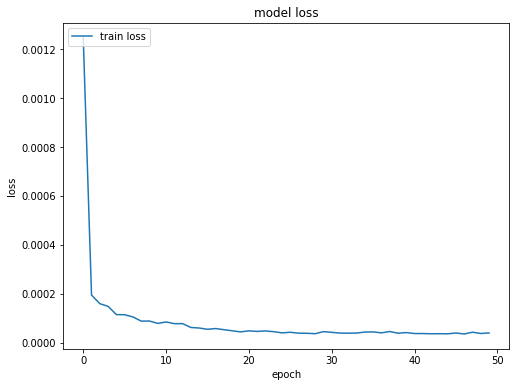

Normalized Rmse= 0.0065493347659788415 RMSE= 16.523872559800026 MAPE= 0.009455987019604109
Repeat= 3


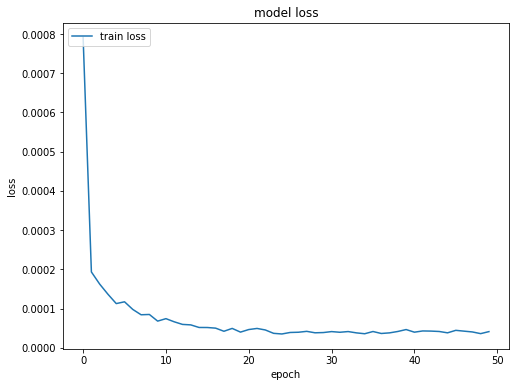

Normalized Rmse= 0.009020469687631386 RMSE= 22.758436760978036 MAPE= 0.011951204740126316
Repeat= 4


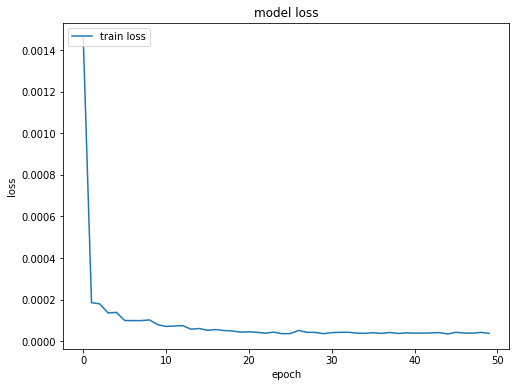

Normalized Rmse= 0.01007780948049187 RMSE= 25.426100728293015 MAPE= 0.012058157470824053
Repeat= 5


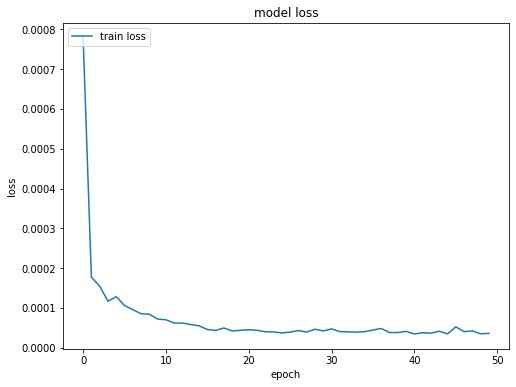

Normalized Rmse= 0.011030473636335924 RMSE= 27.829611398217256 MAPE= 0.01563174764665183
Repeat= 6


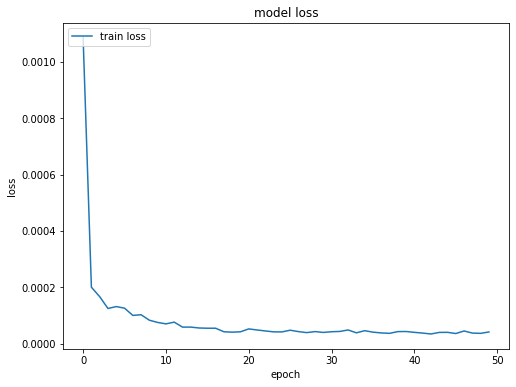

Normalized Rmse= 0.013000778772118304 RMSE= 32.80070573820677 MAPE= 0.01552898812688048
Repeat= 7


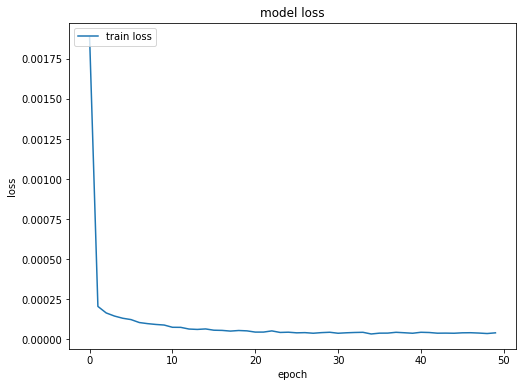

Normalized Rmse= 0.013991535778403731 RMSE= 35.300342446973495 MAPE= 0.018652543437896817
Repeat= 8


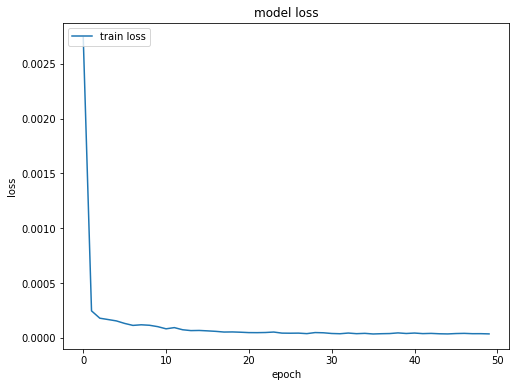

Normalized Rmse= 0.00725290194640576 RMSE= 18.298922716394454 MAPE= 0.007858188842952375
Repeat= 9


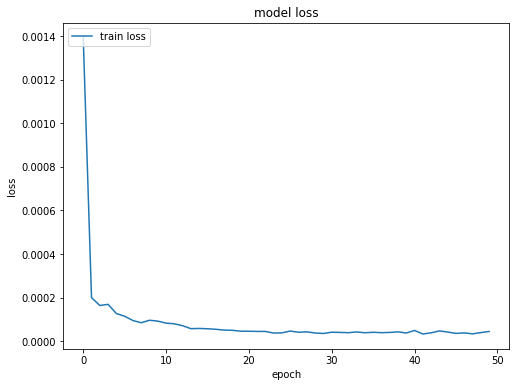

Normalized Rmse= 0.005431117309875141 RMSE= 13.70259671130294 MAPE= 0.005323427264969605
Mean Norm RMSE= 0.009949850841944701 Mean RMSE= 25.103270031295065 Mean MAPE= 0.012686768896961825


In [10]:
#model GRU1

av_rmse=0
av_rmse1=0
av_mape=0
for i in range(10):
    print('Repeat=',i)
    GRU1 = Sequential()
    GRU1.add(GRU(Lstm_gru_units, input_shape=(30, 1)))
    GRU1.add(Dropout(drop_rate))
    GRU1.add(Dense(units = 1, activation = 'linear'))
    #GRU1.summary()
    GRU1.compile(loss='mse', optimizer='adam')
    history=GRU1.fit(x_train,y_train,epochs=50,batch_size=Batch_size, verbose=0)
    plot_model(GRU1, to_file='model_plot2-1.png', show_shapes=True, show_layer_names=True)
      
    y_test_pred=GRU1.predict(x_test)
    y_train_pred=GRU1.predict(x_train)

    rmse=mean_squared_error(y_test,y_test_pred,squared=False)
    av_rmse=av_rmse+rmse
    y_test_pred_nn=sca.inverse_transform(y_test_pred)
    y_train_pred_nn=sca.inverse_transform(y_train_pred)
    y_test_nn=sca.inverse_transform(y_test)
    rmse1=mean_squared_error(y_test_nn,y_test_pred_nn,squared=False)
    mape=mean_absolute_percentage_error(y_test,y_test_pred)
    av_rmse1=av_rmse1+rmse1
    av_mape=av_mape+mape
    GRU1.reset_states()
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train loss'], loc='upper left')
    plt.show()
    print('Normalized Rmse=',rmse, 'RMSE=',rmse1,'MAPE=',mape)

print('Mean Norm RMSE=',av_rmse/10,'Mean RMSE=',av_rmse1/10,'Mean MAPE=',av_mape/10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


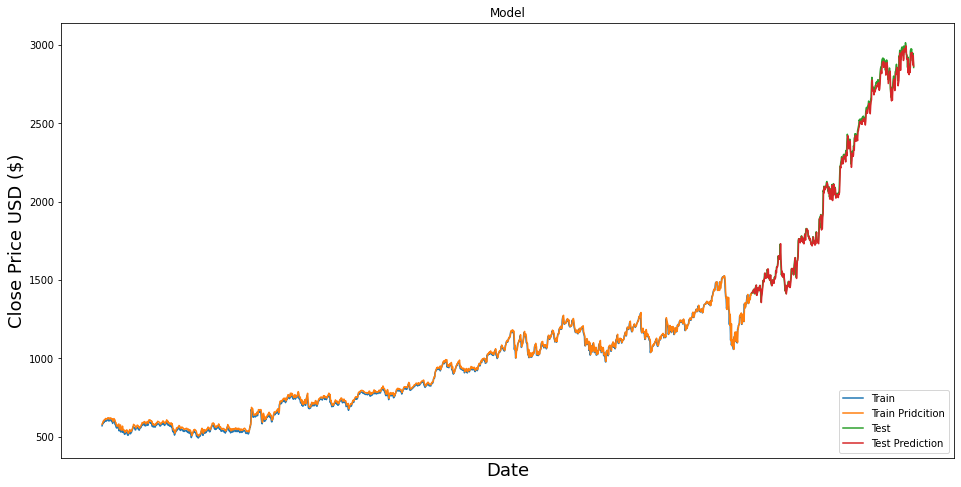

In [11]:
train=data_close[window_size:split_index+window_size]
valid=data_close[split_index+window_size:]

train['Prediction'] =y_train_pred_nn
valid['Prediction'] =y_test_pred_nn


#Visualize the data
#print(valid)
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train[['Close','Prediction']])
plt.plot(valid[['Close', 'Prediction']])
plt.gca().xaxis.set_major_locator(mdp.DayLocator(interval=120))
plt.legend(['Train', 'Train Pridcition','Test', 'Test Prediction'], loc='lower right')
plt.show()
#valid.head()

Repeat= 0


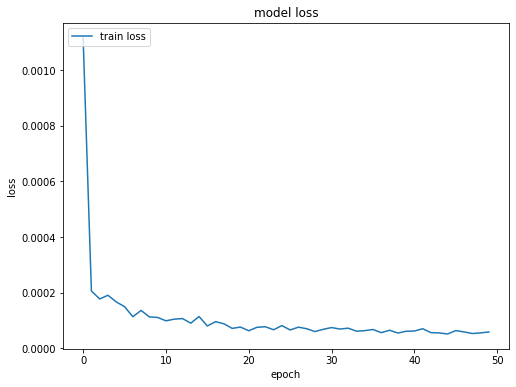

Normalized Rmse= 0.031629271150305956 RMSE= 79.79995028188301 MAPE= 0.04444198465285493
Repeat= 1


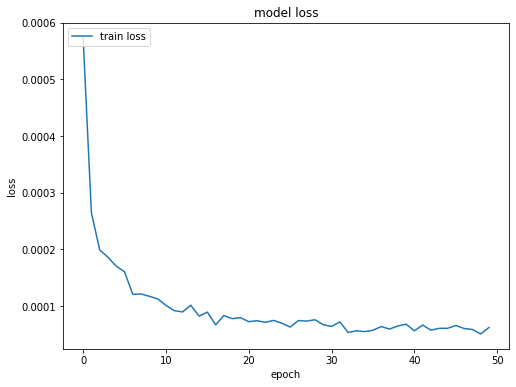

Normalized Rmse= 0.024039008947984157 RMSE= 60.64991660557781 MAPE= 0.030134235283785518
Repeat= 2


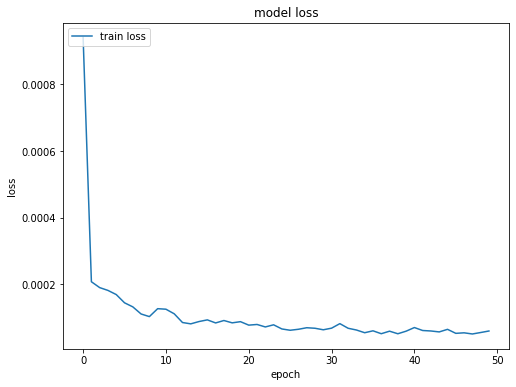

Normalized Rmse= 0.006732099938154534 RMSE= 16.98494126883832 MAPE= 0.006254411304191434
Repeat= 3


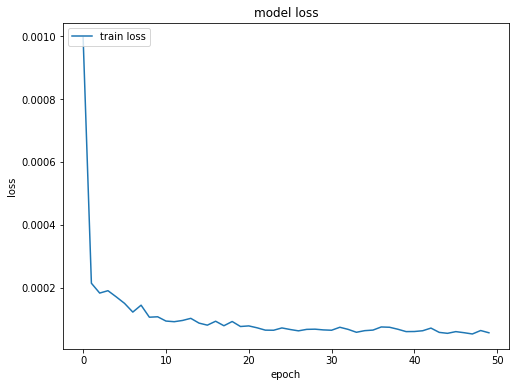

Normalized Rmse= 0.017140217005351278 RMSE= 43.24439966150814 MAPE= 0.023855411164651747
Repeat= 4


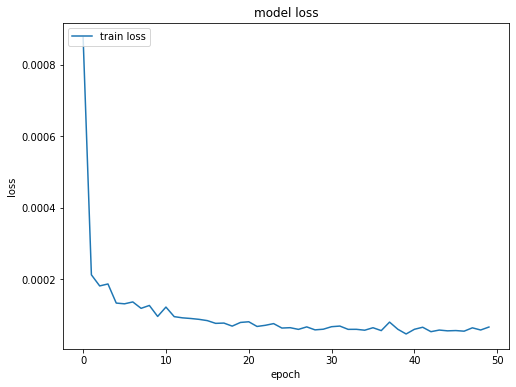

Normalized Rmse= 0.004901230003306899 RMSE= 12.365704440121231 MAPE= 0.0042643769839169066
Repeat= 5


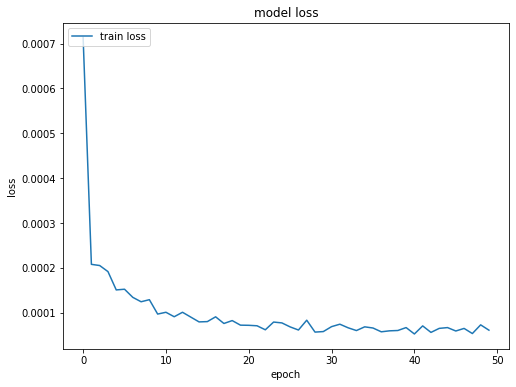

Normalized Rmse= 0.017713216104545154 RMSE= 44.6900685403421 MAPE= 0.0181578234530694
Repeat= 6


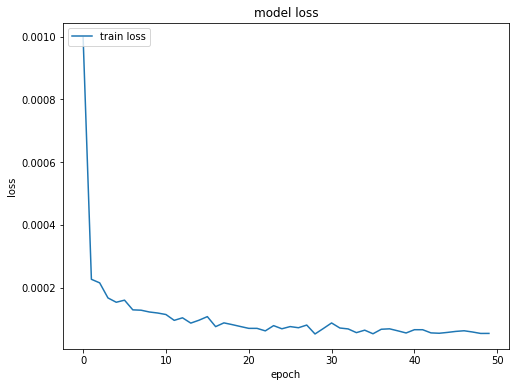

Normalized Rmse= 0.023356779858963776 RMSE= 58.92869165335349 MAPE= 0.030859044974492003
Repeat= 7


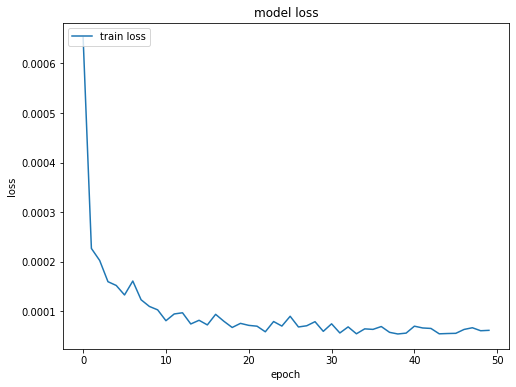

Normalized Rmse= 0.002415918333880749 RMSE= 6.095281333480617 MAPE= 0.00298392792017739
Repeat= 8


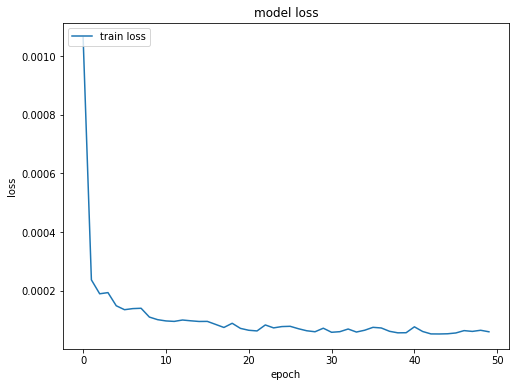

Normalized Rmse= 0.011843615369700036 RMSE= 29.88114014276901 MAPE= 0.01618873375556037
Repeat= 9


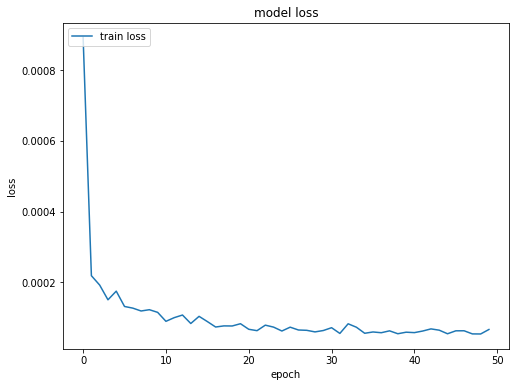

Normalized Rmse= 0.012770035202416161 RMSE= 32.21851150900361 MAPE= 0.016951259918512596
Mean Norm RMSE= 0.01525413919146087 Mean RMSE= 38.485860543687735 Mean MAPE= 0.01940912094112123


In [13]:
#model GRU2
av_rmse=0
av_rmse1=0
av_mape=0
for i in range(10):
    print('Repeat=',i)
    GRU2 = Sequential()
    GRU2.add(GRU(Lstm_gru_units, input_shape=(30, 1),return_sequences=True))
    GRU2.add(Dropout(drop_rate))
    GRU2.add(GRU(Lstm_gru_units, input_shape=(30, 1)),)
    GRU2.add(Dropout(drop_rate))
    GRU2.add(Dense(units = 1, activation = 'linear'))
    #GRU2.summary()
    plot_model(GRU2, to_file='model_plot2-2.png', show_shapes=True, show_layer_names=True)

    GRU2.compile(loss='mse', optimizer='adam')

    history=GRU2.fit(x_train,y_train,epochs=50,batch_size=Batch_size, verbose=0)

    y_test_pred=GRU2.predict(x_test)
    y_train_pred=GRU2.predict(x_train) 

    rmse=mean_squared_error(y_test,y_test_pred,squared=False)
    av_rmse=av_rmse+rmse
    y_test_pred_nn=sca.inverse_transform(y_test_pred)
    y_train_pred_nn=sca.inverse_transform(y_train_pred)
    y_test_nn=sca.inverse_transform(y_test)
    rmse1=mean_squared_error(y_test_nn,y_test_pred_nn,squared=False)
    mape=mean_absolute_percentage_error(y_test,y_test_pred)
    av_rmse1=av_rmse1+rmse1
    av_mape=av_mape+mape
    GRU2.reset_states()
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train loss'], loc='upper left')
    plt.show()
    print('Normalized Rmse=',rmse, 'RMSE=',rmse1,'MAPE=',mape)

print('Mean Norm RMSE=',av_rmse/10,'Mean RMSE=',av_rmse1/10,'Mean MAPE=',av_mape/10)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


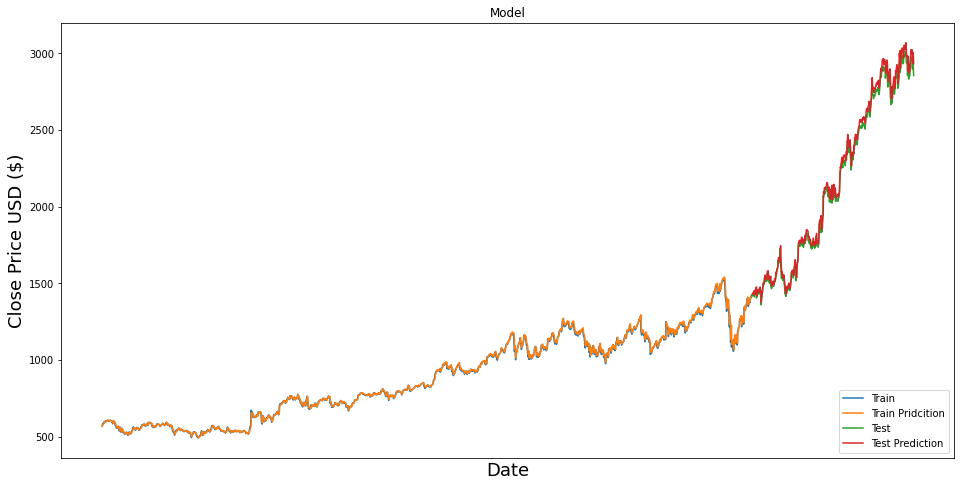

In [14]:
train=data_close[window_size:split_index+window_size]
valid=data_close[split_index+window_size:]

train['Prediction'] =y_train_pred_nn
valid['Prediction'] =y_test_pred_nn


#Visualize the data
#print(valid)
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train[['Close','Prediction']])
plt.plot(valid[['Close', 'Prediction']])
plt.gca().xaxis.set_major_locator(mdp.DayLocator(interval=120))
plt.legend(['Train', 'Train Pridcition','Test', 'Test Prediction'], loc='lower right')
plt.show()
#valid.head()

Repeat= 0


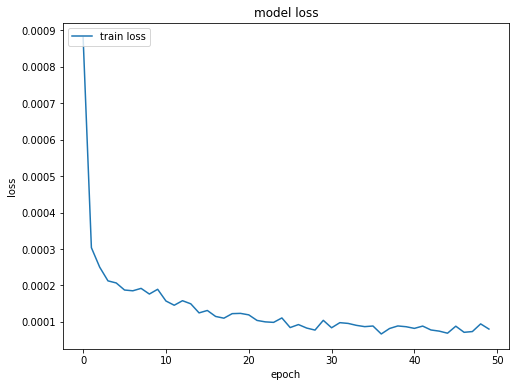

Normalized Rmse= 0.01954684562034864 RMSE= 49.31625022958775 MAPE= 0.0323345455808845
Repeat= 1


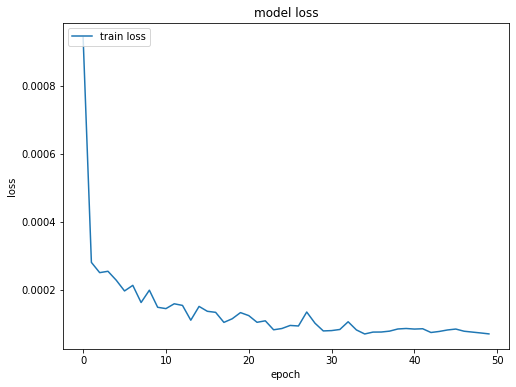

Normalized Rmse= 0.03473152242001393 RMSE= 87.62691824278181 MAPE= 0.03528713045883931
Repeat= 2


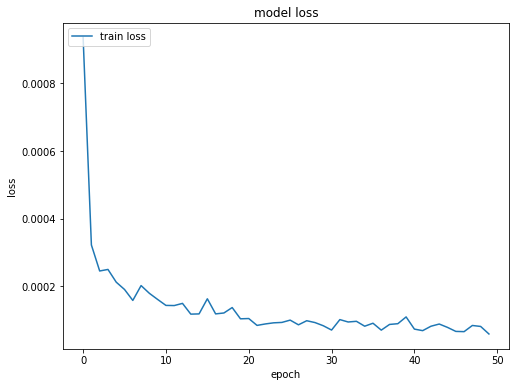

Normalized Rmse= 0.040232763381362474 RMSE= 101.50640147767771 MAPE= 0.03914354597672697
Repeat= 3


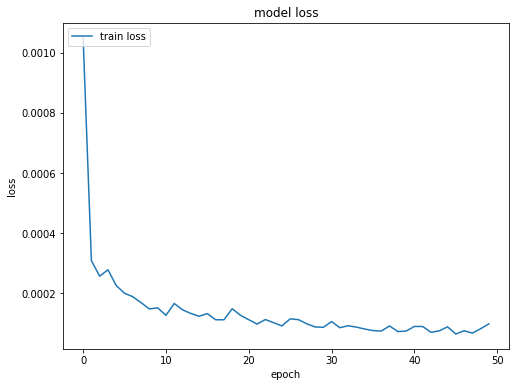

Normalized Rmse= 0.013828510371017833 RMSE= 34.889028674530515 MAPE= 0.01159841059188064
Repeat= 4


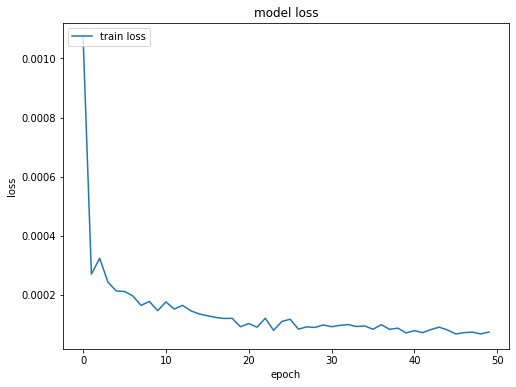

Normalized Rmse= 0.012390111921652592 RMSE= 31.259965159628706 MAPE= 0.0151399099523991
Repeat= 5


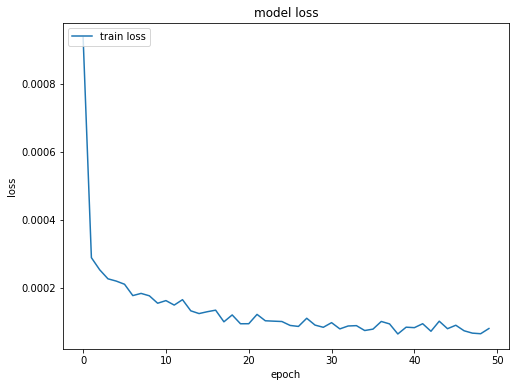

Normalized Rmse= 0.0537173926327017 RMSE= 135.5278442545954 MAPE= 0.0715841782706939
Repeat= 6


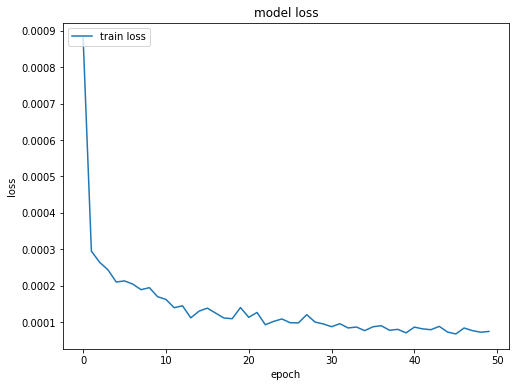

Normalized Rmse= 0.025896804428851842 RMSE= 65.33704317951886 MAPE= 0.03349441373691267
Repeat= 7


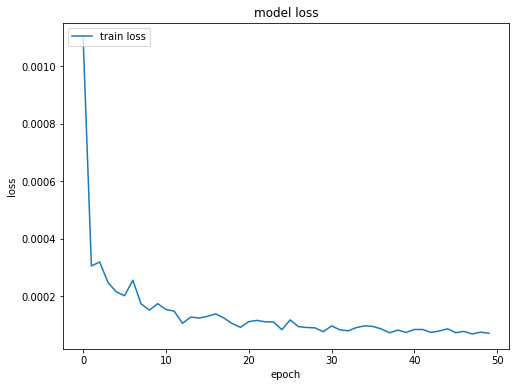

Normalized Rmse= 0.012103185684052524 RMSE= 30.536052959879985 MAPE= 0.01823539110124867
Repeat= 8


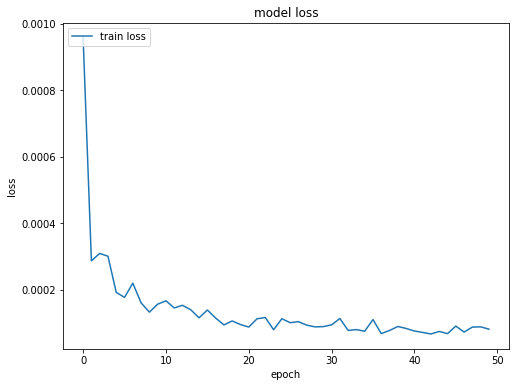

Normalized Rmse= 0.014448198378393283 RMSE= 36.452486521926524 MAPE= 0.011636546791613344
Repeat= 9


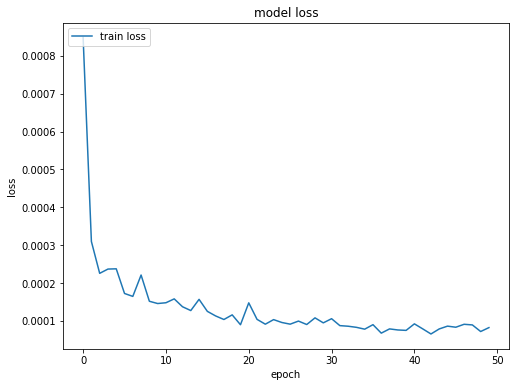

Normalized Rmse= 0.041861093948351205 RMSE= 105.61464984246278 MAPE= 0.047409347542277415
Mean Norm RMSE= 0.026875642878674603 Mean RMSE= 67.806664054259 Mean MAPE= 0.031586342000347656


In [17]:
#model GRU3
av_rmse=0
av_rmse1=0
av_mape=0
for i in range(10):
      print('Repeat=',i)
      GRU3 = Sequential()
      GRU3.add(GRU(Lstm_gru_units, input_shape=(30, 1),return_sequences=True))
      GRU3.add(Dropout(drop_rate))
      GRU3.add(GRU(Lstm_gru_units, input_shape=(30, 1),return_sequences=True))
      GRU3.add(Dropout(drop_rate))
      GRU3.add(GRU(Lstm_gru_units, input_shape=(30, 1)),)
      GRU3.add(Dropout(drop_rate))
      GRU3.add(Dense(units = 1, activation = 'linear'))
      #GRU3.summary()
      plot_model(GRU3, to_file='model_plot2-3.png', show_shapes=True, show_layer_names=True)
      GRU3.compile(loss='mse', optimizer='adam')

      history=GRU3.fit(x_train,y_train,epochs=50,batch_size=Batch_size, verbose=0)

      y_test_pred=GRU3.predict(x_test)
      y_train_pred=GRU3.predict(x_train)

      rmse=mean_squared_error(y_test,y_test_pred,squared=False)
      av_rmse=av_rmse+rmse
      y_test_pred_nn=sca.inverse_transform(y_test_pred)
      y_train_pred_nn=sca.inverse_transform(y_train_pred)
      y_test_nn=sca.inverse_transform(y_test)
      rmse1=mean_squared_error(y_test_nn,y_test_pred_nn,squared=False)
      mape=mean_absolute_percentage_error(y_test,y_test_pred)
      av_rmse1=av_rmse1+rmse1
      av_mape=av_mape+mape
      GRU3.reset_states()
      plt.figure(figsize=(8, 6))
      plt.plot(history.history['loss'])
      #plt.plot(history.history['val_loss'])
      plt.title('model loss')
      plt.ylabel('loss')
      plt.xlabel('epoch')
      plt.legend(['train loss'], loc='upper left')
      plt.show()
      print('Normalized Rmse=',rmse, 'RMSE=',rmse1,'MAPE=',mape)

print('Mean Norm RMSE=',av_rmse/10,'Mean RMSE=',av_rmse1/10,'Mean MAPE=',av_mape/10)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


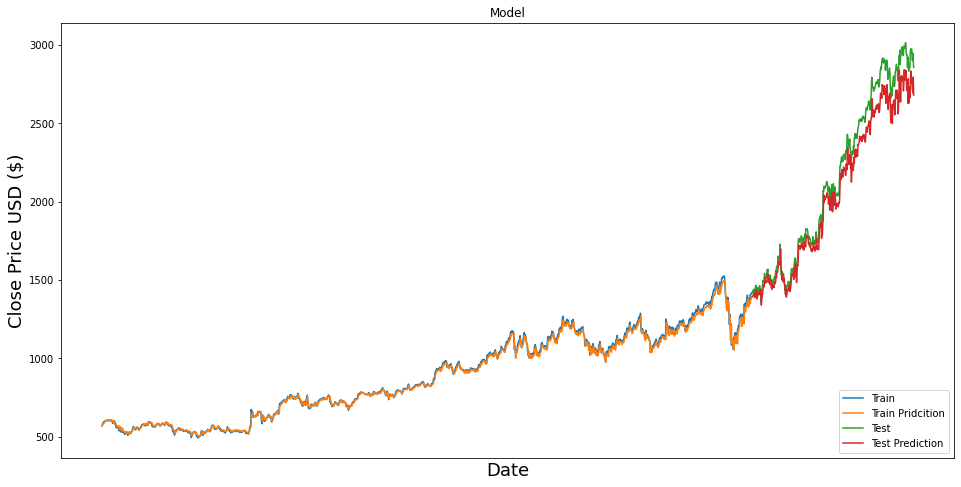

In [19]:
train=data_close[window_size:split_index+window_size]
valid=data_close[split_index+window_size:]

train['Prediction'] =y_train_pred_nn
valid['Prediction'] =y_test_pred_nn


#Visualize the data
#print(valid)
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train[['Close','Prediction']])
plt.plot(valid[['Close', 'Prediction']])
plt.gca().xaxis.set_major_locator(mdp.DayLocator(interval=120))
plt.legend(['Train', 'Train Pridcition','Test', 'Test Prediction'], loc='lower right')
plt.show()
#valid.head()